In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [2]:



dataset=pd.read_csv('/home/ksolves/PycharmProjects/MachineLearning/AirPassengers.csv')
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexdataset=dataset.set_index(['Month'])

print(indexdataset.head())
print(indexdataset.dtypes)


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
#Passengers    int64
dtype: object


/home/ksolves/PycharmProjects/MachineLearning/venv/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


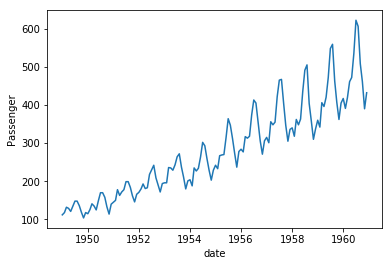

In [3]:

plt.xlabel('date')
plt.ylabel('Passenger')
plt.plot(indexdataset,)
rolmean = indexdataset.rolling( window=12).mean()
rolstd = indexdataset.rolling( window=12).std()
#print(rolmean,rolstd)


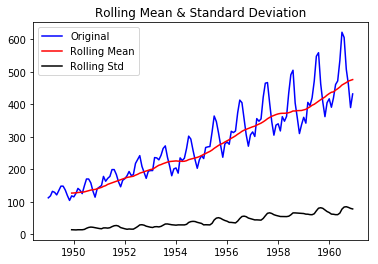

Teststatistic               0.815369
#lagused                    0.991880
p-value                    13.000000
no.of observation used    130.000000
CriticalValue (1%)         -3.481682
CriticalValue (5%)         -2.884042
CriticalValue (10%)        -2.578770
dtype: float64


In [4]:

orig = plt.plot(indexdataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

from statsmodels.tsa.stattools import adfuller
dftest=adfuller(indexdataset['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Teststatistic','#lagused','p-value','no.of observation used'])
for key,value in dftest[4].items():
    dfoutput['CriticalValue (%s)'%key]=value
print(dfoutput)


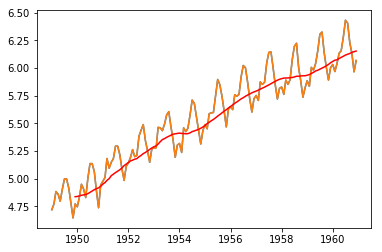

In [5]:

indexdataset_logscale=np.log(indexdataset)
plt.plot(indexdataset_logscale)
movingaverage=indexdataset_logscale.rolling(window=12).mean()
movingstd=indexdataset_logscale.rolling(window=12).std()
plt.plot(indexdataset_logscale)
plt.plot(movingaverage,color='red')



In [6]:
datasetlogscalemovingaverage=indexdataset_logscale-movingaverage
datasetlogscalemovingaverage.dropna(inplace=True)
print(datasetlogscalemovingaverage.head(12))


            #Passengers
Month                  
1949-12-01    -0.065494
1950-01-01    -0.093449
1950-02-01    -0.007566
1950-03-01     0.099416
1950-04-01     0.052142
1950-05-01    -0.027529
1950-06-01     0.139881
1950-07-01     0.260184
1950-08-01     0.248635
1950-09-01     0.162937
1950-10-01    -0.018578
1950-11-01    -0.180379


In [7]:

def test_stationarity(timeseries):
    

    rolmean = timeseries.rolling( window=12).mean()
    rolstd = timeseries.rolling( window=12).std()

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    dftest=adfuller(indexdataset['#Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Teststatistic','#lagused','p-value','no.of observation used'])
    for key,value in dftest[4].items():
        
        
        dfoutput['CriticalValue (%s)'%key]=value
    print(dfoutput)


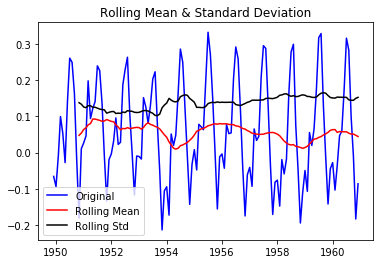

Teststatistic               0.815369
#lagused                    0.991880
p-value                    13.000000
no.of observation used    130.000000
CriticalValue (1%)         -3.481682
CriticalValue (5%)         -2.884042
CriticalValue (10%)        -2.578770
dtype: float64


In [8]:

test_stationarity(datasetlogscalemovingaverage)


            #Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01     0.052186
1949-03-01     0.112117
1949-04-01    -0.022990
1949-05-01    -0.064022


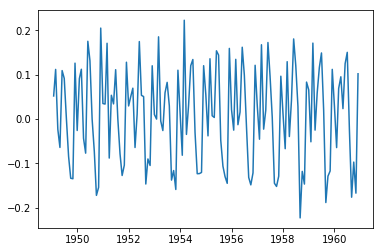

In [9]:

datasetlogshifting=indexdataset_logscale-indexdataset_logscale.shift()
plt.plot(datasetlogshifting)
print(indexdataset_logscale.head())
print(datasetlogshifting.head())

datasetlogshifting.dropna(inplace=True)

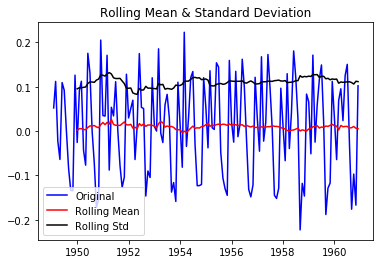

Teststatistic               0.815369
#lagused                    0.991880
p-value                    13.000000
no.of observation used    130.000000
CriticalValue (1%)         -3.481682
CriticalValue (5%)         -2.884042
CriticalValue (10%)        -2.578770
dtype: float64


In [10]:

test_stationarity(datasetlogshifting)


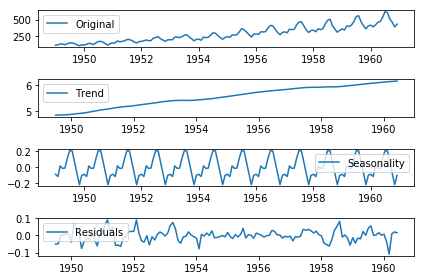

In [12]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexdataset_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexdataset, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


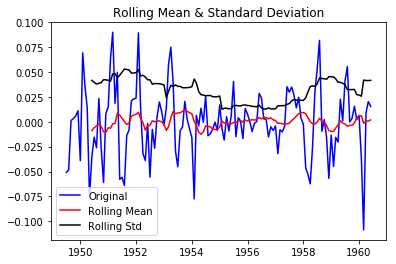

Teststatistic               0.815369
#lagused                    0.991880
p-value                    13.000000
no.of observation used    130.000000
CriticalValue (1%)         -3.481682
CriticalValue (5%)         -2.884042
CriticalValue (10%)        -2.578770
dtype: float64


In [13]:

decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationarity(decomposedlogdata)


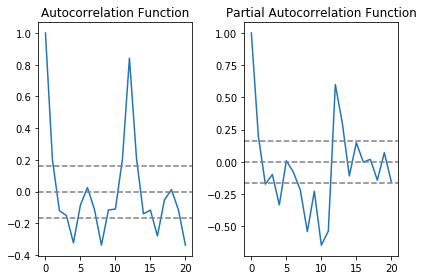

In [14]:

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetlogshifting,nlags=20)
lag_pacf = pacf(datasetlogshifting, nlags=20, method='ols')
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogshifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogshifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


/home/ksolves/PycharmProjects/MachineLearning/venv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ksolves/PycharmProjects/MachineLearning/venv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/ksolves/PycharmProjects/MachineLearning/venv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

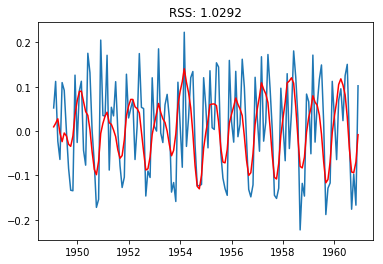

In [16]:

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexdataset_logscale, order=(2, 1, 2))  
results_ARIMA = model.fit()  
plt.plot(datasetlogshifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-datasetlogshifting["#Passengers"])**2))



In [17]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(results_ARIMA.fittedvalues.head())
print(predictions_ARIMA_diff.head())
print(type(predictions_ARIMA_diff))


Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64
Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64
<class 'pandas.core.series.Series'>


In [18]:

predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())
print(type(predictions_ARIMA_diff))

In [19]:

predictions_ARIMA_log=pd.Series(indexdataset_logscale["#Passengers"].ix[0],index=indexdataset_logscale.index)
print(indexdataset_logscale.head())
print(predictions_ARIMA_log.head())
predictions_ARIMA_loga=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
print(predictions_ARIMA_loga.head(10))
print(indexdataset_logscale.head(10))

            #Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791
Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
dtype: float64
Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
1949-07-01    4.740483
1949-08-01    4.729506
1949-09-01    4.699577
1949-10-01    4.665110
dtype: float64
            #Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791
1949-06-01     4.905275
1949-07-01     4.997212
1949-08-01     4.997212
1949-09-01     4.912655
1949-10-01     4.779123


/home/ksolves/PycharmProjects/MachineLearning/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


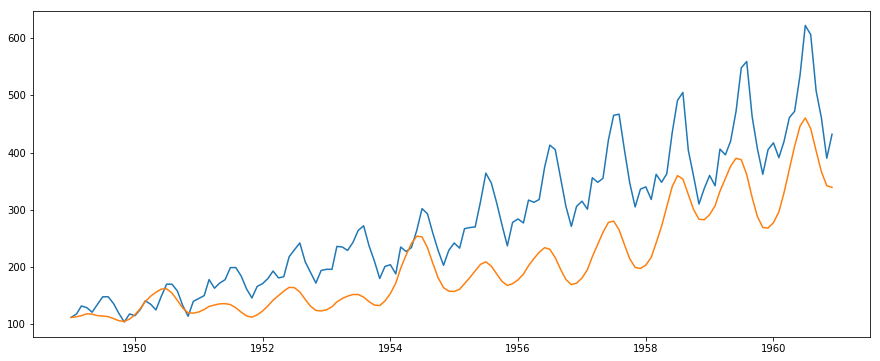

In [83]:

predictions_ARIMA=np.exp(predictions_ARIMA_loga)
plt.plot(indexdataset)
plt.plot(predictions_ARIMA)
y=np.exp(indexdataset_logscale)



In [20]:
m=results_ARIMA.predict(1,156)
#print(m.head(),predictions_ARIMA_diff_cumsum.head())
m=m.cumsum()
m=(m).add(predictions_ARIMA_log,fill_value=4.718499)
print(type(m))
m['1949-01-01']=4.718499
#print(m.head(264))
m=np.exp(m)
print(m.head(156))










<class 'pandas.core.series.Series'>
1949-01-01    112.000014
1949-02-01    113.078122
1949-03-01    115.073416
1949-04-01    118.301993
1949-05-01    117.768370
1949-06-01    114.988278
1949-07-01    114.489526
1949-08-01    113.239584
1949-09-01    109.900662
1949-10-01    106.177217
1949-11-01    104.986416
1949-12-01    108.966778
1950-01-01    116.649987
1950-02-01    127.563195
1950-03-01    139.580451
1950-04-01    149.126196
1950-05-01    155.842561
1950-06-01    161.469037
1950-07-01    161.970399
1950-08-01    154.514241
1950-09-01    141.731366
1950-10-01    128.440835
1950-11-01    120.015650
1950-12-01    119.389905
1951-01-01    121.483624
1951-02-01    125.687052
1951-03-01    131.151924
1951-04-01    133.633908
1951-05-01    135.688787
1951-06-01    136.026964
                 ...    
1959-07-01    387.398889
1959-08-01    361.562412
1959-09-01    321.685134
1959-10-01    288.377142
1959-11-01    269.078730
1959-12-01    268.100161
1960-01-01    277.433065
1960-02-01    

/home/ksolves/PycharmProjects/MachineLearning/venv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
